In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pitchers_23 = pd.read_csv('pitches_23.csv', index_col = 0)

In [4]:
pitchers_23.columns

Index(['gameid', 'GameDate', 'ab', 'pitchnum', 'inning', 'teambat', 'balls',
       'strikes', 'outs', 'pitcher', 'pitcherthrows', 'batter', 'batterside',
       'pitchresult', 'pitchresult_desc', 'eventtype', 'pitchname',
       'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

In [43]:
pitcher_subset = pd.DataFrame(pitchers_23.groupby(['pitcher', 'pitchname_desc']).agg(count=("pitchnum", "count"), min_inning=("inning", "min"), avg_inning=("inning", "mean"))).reset_index()

In [49]:
unique_pitches = pitcher_subset[(pitcher_subset['min_inning'] == 1) & (pitcher_subset['count'] > 5)].value_counts('pitcher')

In [52]:
subset = pd.DataFrame(unique_pitches)

In [57]:
subset[subset['count'] <= 2]

,count
pitcher,
"Okert, Steven",2
"Little, Luke",2
"Bernardino, Brennan",2
"Barnes, Matt",2
"McHugh, Collin",2
"De Leon, Jose",2
"Kelley, Trevor",2
"Richards, Trevor",2
"Snider, Collin",2


In [18]:
len(pitchers[pitchers['pitchname_desc'] == 2])

55

In [12]:
pitchers_23['pitchname'].unique()

array(['FF', 'FC', 'CH', 'SL', 'CU', 'SI', 'KC', 'ST', 'FS', 'FO', 'FA',
       'CS', 'SC', 'SV', 'EP', 'FT', nan, 'KN'], dtype=object)

In [19]:
plot_df = pitchers_23.loc[(pitchers_23['inducedvertbreak'] < 50) & (pitchers_23['pitchname'] == 'FC')]

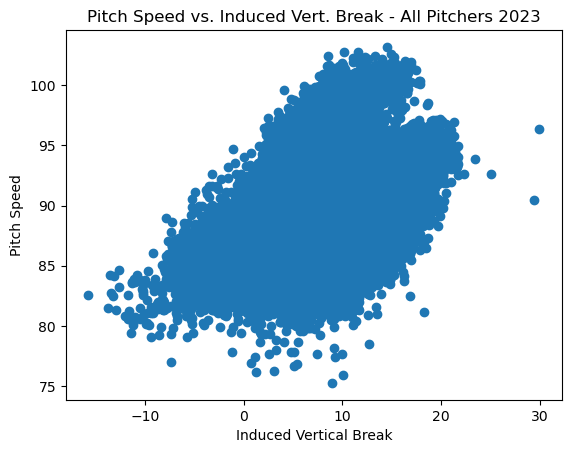

In [20]:
plt.scatter(plot_df['inducedvertbreak'], plot_df['relspeed'])
plt.title('Pitch Speed vs. Induced Vert. Break - All Pitchers 2023')
plt.xlabel('Induced Vertical Break')
plt.ylabel('Pitch Speed')
plt.show()

In [9]:
player_pitches_23 = pitchers_23.loc[pitchers_23['pitcher'] == 'Bradley, Taj']

In [11]:
player_pitches_23.groupby('pitchname_desc')[['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak']].mean()

,spinrate,relspeed,horzbreak,inducedvertbreak
pitchname_desc,,,,
Changeup,1439.041387,89.272320,9.371992,7.510137
Curveball,2405.977342,78.950639,-6.620214,-16.441162
Cutter,2344.621569,88.864670,-4.377402,5.199421
Four-seam FB,2285.198306,96.099672,4.884345,18.804415


In [7]:
pitchers_23.columns

Index(['gameid', 'GameDate', 'ab', 'pitchnum', 'inning', 'teambat', 'balls',
       'strikes', 'outs', 'pitcher', 'pitcherthrows', 'batter', 'batterside',
       'pitchresult', 'pitchresult_desc', 'eventtype', 'pitchname',
       'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

In [12]:
pitchers_23.groupby('pitchname_desc')[['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak']].mean()

,spinrate,relspeed,horzbreak,inducedvertbreak
pitchname_desc,,,,
Changeup,1791.699896,85.442820,4.758397,5.703176
Curveball,2523.280723,79.278890,-3.838827,-9.238938
Cutter,2383.082250,89.187430,-1.508473,7.679158
Eephus Pitch,1178.553412,47.846116,0.005451,16.610896
Fastball,1630.111405,66.583078,5.071873,15.976550
Forkball,1094.752194,82.996718,7.172576,1.335030
Four-seam FB,2280.743998,94.163819,3.193126,15.650759
Knuckle Curve,2464.645524,81.458474,-5.961912,-9.417480
Knuckleball,440.878202,74.987885,3.572131,-0.524261


In [25]:
grouped_pitches.reset_index()

pitchname_desc        ab                                                \
                      count       mean        std   min   25%   50%   75%   
0        Changeup   78616.0  36.762199  21.154922   1.0  20.0  35.0  53.0   
1       Curveball   52563.0  35.231703  21.111923   1.0  18.0  33.0  51.0   
2          Cutter   54119.0  37.686931  22.379205   1.0  19.0  37.0  56.0   
3    Eephus Pitch     379.0  77.699208   8.355480  57.0  72.0  76.0  82.0   
4        Fastball     875.0  77.128000   7.698232  38.0  72.0  77.0  82.0   
5        Forkball     782.0  29.076726  17.476503   1.0  14.0  29.0  43.0   
6    Four-seam FB  231022.0  37.459073  23.068344   1.0  17.0  37.0  57.0   
7   Knuckle Curve   11847.0  35.209251  21.258855   1.0  18.0  33.0  51.0   
8     Knuckleball     203.0  34.876847  19.354678   1.0  20.0  35.0  45.0   
9       Screwball      73.0  58.342466  11.107079  38.0  51.0  56.0  62.0   
10         Sinker  111070.0  40.154164  22.776900   1.0  20.0  41.0  59.0   
11         Slider  129989.0  41.525429  22.556984   1.0  22.0  43.0  60.0   
12     Slow Curve      45.0  40.800000  24.464817   5.0  20.0  36.0  62.0   
13         Slurve    2263.0  27.573133  17.148151   1.0  13.0  27.0  39.0   
14       Splitter   15360.0  41.318034  23.057716   1.0  22.0  42.0  61.0   
15        Sweeper   28341.0  43.366607  21.970280   1.0  25.0  46.0  61.0   
16    Two-seam FB       7.0  63.142857   4.740906  56.0  60.5  65.0  66.0   

           pitchnum  ... awayteam_id         venue_id               \
      max     count  ...         75%    max     count         mean   
0   120.0   78616.0  ...       141.0  158.0   78616.0  1560.459945   
1   116.0   52563.0  ...       141.0  158.0   52563.0  1564.942945   
2   108.0   54119.0  ...       141.0  158.0   54119.0  1456.646427   
3   100.0     379.0  ...       141.0  158.0     379.0  1579.957784   
4    99.0     875.0  ...       142.0  158.0     875.0  2102.939429   
5    88.0     782.0  ...       137.0  158.0     782.0  2512.726343   
6   121.0  231022.0  ...       141.0  158.0  231022.0  1528.877739   
7   107.0   11847.0  ...       142.0  158.0   11847.0  1572.229594   
8    77.0     203.0  ...       138.0  143.0     203.0  2143.206897   
9    88.0      73.0  ...       136.0  158.0      73.0  2202.493151   
10  119.0  111070.0  ...       141.0  158.0  111070.0  1609.082290   
11  118.0  129989.0  ...       141.0  158.0  129989.0  1541.406334   
12   89.0      45.0  ...       144.0  158.0      45.0  1742.911111   
13   85.0    2263.0  ...       141.0  158.0    2263.0   782.174105   
14  110.0   15360.0  ...       141.0  158.0   15360.0  1656.329883   
15  120.0   28341.0  ...       141.0  158.0   28341.0  1539.214107   
16   68.0       7.0  ...       137.0  137.0       7.0  5340.000000   

                                                         
            std     min     25%     50%     75%     max  
0   1712.603489     1.0    12.0   680.0  2889.0  5381.0  
1   1709.040415     1.0    12.0   680.0  2889.0  5381.0  
2   1701.368225     1.0    12.0    32.0  2889.0  5381.0  
3   1754.769895     1.0    12.0    22.0  2681.0  5325.0  
4   1896.209426     1.0    17.0  2394.0  3313.0  5325.0  
5   1538.614614     3.0    31.0  3289.0  3289.0  5325.0  
6   1720.218343     1.0    12.0    32.0  2889.0  5381.0  
7   1647.559635     1.0    15.0   680.0  2889.0  5340.0  
8   1054.283294    10.0  2392.0  2602.0  2680.0  4169.0  
9   1390.529597     4.0  2394.0  2680.0  2680.0  5340.0  
10  1697.620267     1.0    14.0   680.0  2889.0  5381.0  
11  1731.865693     1.0    12.0    32.0  2889.0  5381.0  
12  1858.680004     3.0    31.0    32.0  4169.0  4705.0  
13  1353.419791     1.0    14.0    17.0  2392.0  5381.0  
14  1721.824460     1.0    14.0  2392.0  2889.0  5381.0  
15  1657.499400     1.0    12.0   680.0  2889.0  5381.0  
16     0.000000  5340.0  5340.0  5340.0  5340.0  5340.0  

[17 rows x 129 columns]